In [62]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

#turn off warnings
import warnings
warnings.filterwarnings("ignore")

* Lastly, due to time constraints we couldn't analyze more of the things. From the information we gathered below, analysis on the relationship between mental disorders and suicide rates could be made to show the relavance of the findings of the relationship between houshold income and mental disorders.

# Suicide rates and HDI cleanup

In [63]:
# get the data for 2020
suicide_rates_df = pd.read_csv('Data/Resource Datasets/master.csv')
suicide_rates_df = suicide_rates_df.drop(['country-year',' gdp_for_year ($) '], axis=1)
suicide_rates_df = suicide_rates_df[suicide_rates_df['year'] == 2020]
suicide_rates_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
27820,Antigua and Barbuda,2020,male,5-14 years,NaN,92664,0.000000,0.920514,13992.744480,Generation X
27821,Argentina,2020,male,5-14 years,NaN,45376763,0.000000,0.832784,8579.017773,Generation X
27822,Armenia,2020,male,5-14 years,NaN,2805608,0.000000,0.756001,4266.018074,Generation X
27823,Australia,2020,male,5-14 years,15.0,25655289,0.058467,0.960859,51692.842750,Generation X
27824,Austria,2020,male,5-14 years,2.0,8916864,0.022429,0.921971,48586.801320,Generation X
...,...,...,...,...,...,...,...,...,...,...
31505,Ukraine,2020,female,75+ years,NaN,44132049,0.000000,0.776725,3724.938437,G.I. Generation
31506,United Kingdom,2020,female,75+ years,NaN,67081000,0.000000,0.916840,41059.168810,G.I. Generation
31507,United States of America,2020,female,75+ years,521.0,331501080,0.157164,0.917541,63593.443620,G.I. Generation
31508,Uruguay,2020,female,75+ years,NaN,3429086,0.000000,0.822487,15438.411670,G.I. Generation


In [64]:
suicide_rates_df["generation"].unique()

array(['Generation X', 'Boomers', 'Silent', 'G.I. Generation'],
      dtype=object)

In [65]:
# get only the countries that have complete data
suicide_rates_df = suicide_rates_df.dropna()
suicide_rates_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
27823,Australia,2020,male,5-14 years,15.0,25655289,0.058467,0.960859,51692.842750,Generation X
27824,Austria,2020,male,5-14 years,2.0,8916864,0.022429,0.921971,48586.801320,Generation X
27834,Costa Rica,2020,male,5-14 years,1.0,5123105,0.019519,0.817895,12140.854150,Generation X
27838,Czechia,2020,male,5-14 years,3.0,10697858,0.028043,0.896591,22931.274600,Generation X
27841,Ecuador,2020,male,5-14 years,44.0,17588595,0.250162,0.737612,5600.389615,Generation X
...,...,...,...,...,...,...,...,...,...,...
31493,Serbia,2020,female,75+ years,62.0,6899126,0.898665,0.796845,7720.510572,G.I. Generation
31495,Singapore,2020,female,75+ years,18.0,5685807,0.316578,0.931806,59797.752180,G.I. Generation
31497,Slovenia,2020,female,75+ years,24.0,2102419,1.141542,0.908508,25517.330670,G.I. Generation
31499,Spain,2020,female,75+ years,182.0,47365655,0.384245,0.889149,27063.193920,G.I. Generation


* The suicide rates in the source data is categorized by sex and age. To get the suicide rates for the whole population of a country, we need to first get the number of suicides, divide it by the population.

In [66]:
# sum up the suicide numbers
country_suicide_rate = suicide_rates_df.groupby(["country"]).sum()
country_suicide_rate

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Australia,24240,3139.0,307863468,12.235294,11.336044,620314.113000
Austria,24240,1072.0,107002368,12.022164,10.950055,583041.615840
Costa Rica,24240,351.0,61477260,6.851314,9.779544,145690.249800
Czechia,24240,1224.0,128374296,11.441543,10.691896,275175.295200
Ecuador,24240,1071.0,211063140,6.089173,8.754587,67204.675380
Estonia,24240,210.0,15954264,15.795150,10.686276,276324.324000
Georgia,24240,202.0,44672592,5.426146,9.608209,51200.289540
Germany,24240,7766.0,997930452,9.338527,11.316522,554501.153640
Guatemala,24240,574.0,202299996,3.404844,7.565747,55240.075404


In [67]:
# get the suicide number column
country_suicide_num = pd.DataFrame(country_suicide_rate["suicides_no"])
country_suicide_num = country_suicide_num.reset_index()
country_suicide_num

,country,suicides_no
0,Australia,3139.0
1,Austria,1072.0
2,Costa Rica,351.0
3,Czechia,1224.0
4,Ecuador,1071.0
5,Estonia,210.0
6,Georgia,202.0
7,Germany,7766.0
8,Guatemala,574.0
9,Iceland,47.0


__Two ways to get population data__

Option 1

In [68]:
pop = pd.DataFrame(suicide_rates_df.groupby(["country"]).mean()["population"])
pop = pop.reset_index()
pop

,country,population
0,Australia,25655289.0
1,Austria,8916864.0
2,Costa Rica,5123105.0
3,Czechia,10697858.0
4,Ecuador,17588595.0
5,Estonia,1329522.0
6,Georgia,3722716.0
7,Germany,83160871.0
8,Guatemala,16858333.0
9,Iceland,366463.0


Option 2

In [69]:
popdata = suicide_rates_df["population"].unique()

In [70]:
countrydata = suicide_rates_df["country"].unique()

In [71]:
pop2 = pd.DataFrame({"country": countrydata, "population": popdata})
pop2

,country,population
0,Australia,25655289
1,Austria,8916864
2,Costa Rica,5123105
3,Czechia,10697858
4,Ecuador,17588595
5,Estonia,1329522
6,Georgia,3722716
7,Germany,83160871
8,Guatemala,16858333
9,Iceland,366463


In [72]:
# retriev HDI income_mental_disorder
# make sure that the HDI entry for each country is the same across each country
hdi = suicide_rates_df["HDI for year"].unique()
hdi

array([0.96085886, 0.92197063, 0.81789476, 0.8965906 , 0.73761186,
       0.88211543, 0.79827985, 0.95397154, 0.65730735, 0.96812874,
       0.81074103, 0.85928656, 0.86682658, 0.91711033, 0.76098691,
       0.95370425, 0.79365434, 0.80927541, 0.94237541, 0.91292159,
       0.90327944, 0.92051425, 0.92848182, 0.90303855, 0.81202921,
       0.88539199, 0.72148602, 0.8989306 , 0.80308837, 0.93211539,
       0.60365051, 0.94547327, 0.81351994, 0.87898093, 0.89101055,
       0.9025494 , 0.74746252, 0.92225211, 0.75000962, 0.79684475,
       0.93180614, 0.90850794, 0.88914884, 0.91754116])

In [73]:
country_hdi = suicide_rates_df.groupby(["country"]).mean()
country_hdi = pd.DataFrame(country_hdi["HDI for year"])
country_hdi = country_hdi.reset_index()
country_hdi

,country,HDI for year
0,Australia,0.944670
1,Austria,0.912505
2,Costa Rica,0.814962
3,Czechia,0.890991
4,Ecuador,0.729549
5,Estonia,0.890523
6,Georgia,0.800684
7,Germany,0.943043
8,Guatemala,0.630479
9,Iceland,0.956801


In [74]:
# Calculate suicide rate
suicide_rate_calc = pd.merge(country_suicide_num, pop, on="country")
suicide_rate_calc

,country,suicides_no,population
0,Australia,3139.0,25655289.0
1,Austria,1072.0,8916864.0
2,Costa Rica,351.0,5123105.0
3,Czechia,1224.0,10697858.0
4,Ecuador,1071.0,17588595.0
5,Estonia,210.0,1329522.0
6,Georgia,202.0,3722716.0
7,Germany,7766.0,83160871.0
8,Guatemala,574.0,16858333.0
9,Iceland,47.0,366463.0


In [75]:
# calculate suicide rates and sort countries into descending order by suicide rates
suicide_rate_calc["Suicide rate"] = suicide_rate_calc["suicides_no"] / suicide_rate_calc["population"]
suicide_rate_calc = suicide_rate_calc.sort_values(by="Suicide rate", ascending=False)
suicide_rate_calc

,country,suicides_no,population,Suicide rate
12,Lithuania,608.0,2794885.0,0.000218
19,Slovenia,368.0,2102419.0,0.000175
5,Estonia,210.0,1329522.0,0.000158
11,Latvia,298.0,1900449.0,0.000157
17,Serbia,895.0,6899126.0,0.000130
9,Iceland,47.0,366463.0,0.000128
0,Australia,3139.0,25655289.0,0.000122
1,Austria,1072.0,8916864.0,0.000120
3,Czechia,1224.0,10697858.0,0.000114
10,Kazakhstan,2144.0,18755666.0,0.000114


In [76]:
suicide_rate_calc["# Suicides Per 100k People"] = suicide_rate_calc["Suicide rate"] * 100000
suicide_rate_calc

,country,suicides_no,population,Suicide rate,# Suicides Per 100k People
12,Lithuania,608.0,2794885.0,0.000218,21.754026
19,Slovenia,368.0,2102419.0,0.000175,17.503647
5,Estonia,210.0,1329522.0,0.000158,15.795150
11,Latvia,298.0,1900449.0,0.000157,15.680505
17,Serbia,895.0,6899126.0,0.000130,12.972658
9,Iceland,47.0,366463.0,0.000128,12.825306
0,Australia,3139.0,25655289.0,0.000122,12.235294
1,Austria,1072.0,8916864.0,0.000120,12.022164
3,Czechia,1224.0,10697858.0,0.000114,11.441543
10,Kazakhstan,2144.0,18755666.0,0.000114,11.431212


In [77]:
# Merge suicide rate and HDI Data
Suicide_Rate_HDI = pd.merge(suicide_rate_calc, country_hdi, on="country")
Suicide_Rate_HDI

,country,suicides_no,population,Suicide rate,# Suicides Per 100k People,HDI for year
0,Lithuania,608.0,2794885.0,0.000218,21.754026,0.878919
1,Slovenia,368.0,2102419.0,0.000175,17.503647,0.910715
2,Estonia,210.0,1329522.0,0.000158,15.795150,0.890523
3,Latvia,298.0,1900449.0,0.000157,15.680505,0.869134
4,Serbia,895.0,6899126.0,0.000130,12.972658,0.803060
5,Iceland,47.0,366463.0,0.000128,12.825306,0.956801
6,Australia,3139.0,25655289.0,0.000122,12.235294,0.944670
7,Austria,1072.0,8916864.0,0.000120,12.022164,0.912505
8,Czechia,1224.0,10697858.0,0.000114,11.441543,0.890991
9,Kazakhstan,2144.0,18755666.0,0.000114,11.431212,0.812130


In [78]:
#Suicide_Rate_HDI.to_csv("../Cleaned up Datasets/Suicide_Rate_HDI.csv")

# Household income cleanup

The "PPP GNI" column is the average monthly earnings 

In [79]:
country_income = pd.read_csv("Data/Resource Datasets/World PPP.csv")
country_income

,Average monthly earnings of employees by sex and occupation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,With the aim of promoting international compar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Downloaded from ILOSTAT. Last update on 23/04/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Average monthly earnings of employees,NaN,NaN,NaN
4,Reference area,Source,Sex,Occupation,Time,Local currency,2017 PPP $,U.S. dollars,NaN
...,...,...,...,...,...,...,...,...,...
26033,Zimbabwe,LFS - Labour Force Survey,Female,"6. Skilled agricultural, forestry and fishery ...",2021,2433.02,0.96,NaN,Notes\n\nAverage monthly earnings of employees...
26034,Zimbabwe,LFS - Labour Force Survey,Female,7. Craft and related trades workers,2021,9162.74,3.62,NaN,Notes\n\nAverage monthly earnings of employees...
26035,Zimbabwe,LFS - Labour Force Survey,Female,"8. Plant and machine operators, and assemblers",2021,26357.84,10.42,NaN,Notes\n\nAverage monthly earnings of employees...
26036,Zimbabwe,LFS - Labour Force Survey,Female,9. Elementary occupations,2021,3959.26,1.56,NaN,Notes\n\nAverage monthly earnings of employees...


In [80]:
country_income = country_income.loc[4:26037, :]
country_income

,Average monthly earnings of employees by sex and occupation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
4,Reference area,Source,Sex,Occupation,Time,Local currency,2017 PPP $,U.S. dollars,NaN
5,Afghanistan,HIES - Households Living Conditions Survey,Total,Total,2014,8848.57,498.43,154.57,Notes\n\nAverage monthly earnings of employees...
6,Afghanistan,HIES - Households Living Conditions Survey,Total,1. Managers,2014,17310.44,975.09,302.38,Notes\n\nAverage monthly earnings of employees...
7,Afghanistan,HIES - Households Living Conditions Survey,Total,2. Professionals,2014,10508.62,591.94,183.56,Notes\n\nAverage monthly earnings of employees...
8,Afghanistan,HIES - Households Living Conditions Survey,Total,3. Technicians and associate professionals,2014,12426.72,699.99,217.07,Notes\n\nAverage monthly earnings of employees...
...,...,...,...,...,...,...,...,...,...
26033,Zimbabwe,LFS - Labour Force Survey,Female,"6. Skilled agricultural, forestry and fishery ...",2021,2433.02,0.96,NaN,Notes\n\nAverage monthly earnings of employees...
26034,Zimbabwe,LFS - Labour Force Survey,Female,7. Craft and related trades workers,2021,9162.74,3.62,NaN,Notes\n\nAverage monthly earnings of employees...
26035,Zimbabwe,LFS - Labour Force Survey,Female,"8. Plant and machine operators, and assemblers",2021,26357.84,10.42,NaN,Notes\n\nAverage monthly earnings of employees...
26036,Zimbabwe,LFS - Labour Force Survey,Female,9. Elementary occupations,2021,3959.26,1.56,NaN,Notes\n\nAverage monthly earnings of employees...


In [81]:
country_income = country_income[["Average monthly earnings of employees by sex and occupation", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 7"]]
country_income

,Average monthly earnings of employees by sex and occupation,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 7
4,Reference area,Sex,Occupation,Time,U.S. dollars
5,Afghanistan,Total,Total,2014,154.57
6,Afghanistan,Total,1. Managers,2014,302.38
7,Afghanistan,Total,2. Professionals,2014,183.56
8,Afghanistan,Total,3. Technicians and associate professionals,2014,217.07
...,...,...,...,...,...
26033,Zimbabwe,Female,"6. Skilled agricultural, forestry and fishery ...",2021,NaN
26034,Zimbabwe,Female,7. Craft and related trades workers,2021,NaN
26035,Zimbabwe,Female,"8. Plant and machine operators, and assemblers",2021,NaN
26036,Zimbabwe,Female,9. Elementary occupations,2021,NaN


In [82]:
country_income.columns=["Reference area", "Sex", "Occupation", "Time", "PPP GNI"]
country_income

,Reference area,Sex,Occupation,Time,PPP GNI
4,Reference area,Sex,Occupation,Time,U.S. dollars
5,Afghanistan,Total,Total,2014,154.57
6,Afghanistan,Total,1. Managers,2014,302.38
7,Afghanistan,Total,2. Professionals,2014,183.56
8,Afghanistan,Total,3. Technicians and associate professionals,2014,217.07
...,...,...,...,...,...
26033,Zimbabwe,Female,"6. Skilled agricultural, forestry and fishery ...",2021,NaN
26034,Zimbabwe,Female,7. Craft and related trades workers,2021,NaN
26035,Zimbabwe,Female,"8. Plant and machine operators, and assemblers",2021,NaN
26036,Zimbabwe,Female,9. Elementary occupations,2021,NaN


In [83]:
country_income = country_income.loc[5:26037, :]
country_income

,Reference area,Sex,Occupation,Time,PPP GNI
5,Afghanistan,Total,Total,2014,154.57
6,Afghanistan,Total,1. Managers,2014,302.38
7,Afghanistan,Total,2. Professionals,2014,183.56
8,Afghanistan,Total,3. Technicians and associate professionals,2014,217.07
9,Afghanistan,Total,4. Clerical support workers,2014,267.12
...,...,...,...,...,...
26033,Zimbabwe,Female,"6. Skilled agricultural, forestry and fishery ...",2021,NaN
26034,Zimbabwe,Female,7. Craft and related trades workers,2021,NaN
26035,Zimbabwe,Female,"8. Plant and machine operators, and assemblers",2021,NaN
26036,Zimbabwe,Female,9. Elementary occupations,2021,NaN


In [84]:
country_income = country_income.loc[(country_income["Sex"]=="Total") & (country_income["Occupation"]=="Total") & (country_income["Time"]=="2020"), :]
country_income

,Reference area,Sex,Occupation,Time,PPP GNI
39,Afghanistan,Total,Total,2020,171.87
283,Albania,Total,Total,2020,493.90
650,Argentina,Total,Total,2020,514.35
930,Armenia,Total,Total,2020,248.63
1357,Austria,Total,Total,2020,4753.41
...,...,...,...,...,...
24575,United Kingdom,Total,Total,2020,3189.75
24875,United States,Total,Total,2020,4502.19
25265,Uruguay,Total,Total,2020,879.92
25645,Viet Nam,Total,Total,2020,296.18


In [85]:
del country_income["Sex"]
del country_income["Occupation"]
del country_income["Time"]
country_income

,Reference area,PPP GNI
39,Afghanistan,171.87
283,Albania,493.90
650,Argentina,514.35
930,Armenia,248.63
1357,Austria,4753.41
...,...,...
24575,United Kingdom,3189.75
24875,United States,4502.19
25265,Uruguay,879.92
25645,Viet Nam,296.18


In [86]:
country_income = country_income.rename(columns={"Reference area" : "Country"})
country_income

,Country,PPP GNI
39,Afghanistan,171.87
283,Albania,493.90
650,Argentina,514.35
930,Armenia,248.63
1357,Austria,4753.41
...,...,...
24575,United Kingdom,3189.75
24875,United States,4502.19
25265,Uruguay,879.92
25645,Viet Nam,296.18


In [87]:
country_income = country_income.dropna()
country_income

,Country,PPP GNI
39,Afghanistan,171.87
283,Albania,493.90
650,Argentina,514.35
930,Armenia,248.63
1357,Austria,4753.41
...,...,...
24575,United Kingdom,3189.75
24875,United States,4502.19
25265,Uruguay,879.92
25645,Viet Nam,296.18


In [88]:
country_income = country_income.reset_index(drop=True)
country_income

,Country,PPP GNI
0,Afghanistan,171.87
1,Albania,493.90
2,Argentina,514.35
3,Armenia,248.63
4,Austria,4753.41
...,...,...
59,United Kingdom,3189.75
60,United States,4502.19
61,Uruguay,879.92
62,Viet Nam,296.18


In [89]:
country_income.to_csv("Data/Cleaned up Datasets/WorldPPPCleaned.csv")

# Generation data cleanup
The original code in this section is written by Mason Wikoff (@masonwiki), but some of the comments it will be rewritten for clarity.

In [90]:
df = pd.read_csv('Data/Cleaned up Datasets/cleaned_df.csv')

#Drop unneccesary columns. We keep only need compare country, generations, and their sucicide rates
df = df.drop(['age','sex','year','population','gdp_per_capita ($)','Unnamed: 0','HDI for year'], axis = 1)
df

,country,suicides_no,suicides/100k pop,generation
0,Australia,15.0,0.058467,Generation X
1,Austria,2.0,0.022429,Generation X
2,Costa Rica,1.0,0.019519,Generation X
3,Czechia,3.0,0.028043,Generation X
4,Ecuador,44.0,0.250162,Generation X
...,...,...,...,...
259,Serbia,62.0,0.898665,G.I. Generation
260,Singapore,18.0,0.316578,G.I. Generation
261,Slovenia,24.0,1.141542,G.I. Generation
262,Spain,182.0,0.384245,G.I. Generation


In [91]:
#Group by generation and country to find suicide rates for each generation in each country
#The source data has categorized data by sex, so we sum them up for the total numbers for each population
gen_group = df.groupby(['generation','country']).sum()
print(gen_group)

                                     suicides_no  suicides/100k pop
generation country                                                 
Boomers    Australia                       594.0           2.315312
           Austria                          82.0           0.919606
           Costa Rica                       88.0           1.717708
           Czechia                         155.0           1.448888
           Ecuador                         206.0           1.171214
...                                          ...                ...
Silent     Serbia                          251.0           3.638142
           Singapore                       102.0           1.793941
           Slovenia                        104.0           4.946683
           Spain                          1856.0           3.918451
           United States of America       2990.0           0.901958

[88 rows x 2 columns]


In [92]:
#Split the dataframe based on generation and store them in a dictionary
gen_dfs = {group: group_df for group, group_df in gen_group.groupby('generation')}

#Iterate over the keys and the values in the dictionary to seperate the dataframe into 4 seperate dataframes and save them by their respective generation in their own CSV
for group, group_df in gen_dfs.items():
    #filename = f"Cleaned up Datasets/{group}.csv"
    #group_df.to_csv(filename, index=True)
    print(group_df)

                                     suicides_no  suicides/100k pop
generation country                                                 
Boomers    Australia                       594.0           2.315312
           Austria                          82.0           0.919606
           Costa Rica                       88.0           1.717708
           Czechia                         155.0           1.448888
           Ecuador                         206.0           1.171214
           Estonia                          28.0           2.106020
           Georgia                          25.0           0.671553
           Germany                         798.0           0.959586
           Guatemala                       143.0           0.848245
           Iceland                          10.0           2.728788
           Kazakhstan                      461.0           2.457924
           Latvia                           42.0           2.210004
           Lithuania                        73.0

# Global Suicide Rates Visualization
The original code in this section is written by Fredritz Cabrera (@FredritzNCabrera), but it will be rewritten and commented again below for consistency.

In [93]:
Suicide_Rate_HDI

,country,suicides_no,population,Suicide rate,# Suicides Per 100k People,HDI for year
0,Lithuania,608.0,2794885.0,0.000218,21.754026,0.878919
1,Slovenia,368.0,2102419.0,0.000175,17.503647,0.910715
2,Estonia,210.0,1329522.0,0.000158,15.795150,0.890523
3,Latvia,298.0,1900449.0,0.000157,15.680505,0.869134
4,Serbia,895.0,6899126.0,0.000130,12.972658,0.803060
5,Iceland,47.0,366463.0,0.000128,12.825306,0.956801
6,Australia,3139.0,25655289.0,0.000122,12.235294,0.944670
7,Austria,1072.0,8916864.0,0.000120,12.022164,0.912505
8,Czechia,1224.0,10697858.0,0.000114,11.441543,0.890991
9,Kazakhstan,2144.0,18755666.0,0.000114,11.431212,0.812130


In [94]:
Suicide_Rate = Suicide_Rate_HDI[["country", "# Suicides Per 100k People"]]
Suicide_Rate

,country,# Suicides Per 100k People
0,Lithuania,21.754026
1,Slovenia,17.503647
2,Estonia,15.795150
3,Latvia,15.680505
4,Serbia,12.972658
5,Iceland,12.825306
6,Australia,12.235294
7,Austria,12.022164
8,Czechia,11.441543
9,Kazakhstan,11.431212


* Comparing the suicide rates for each country that has complete data in 2020:

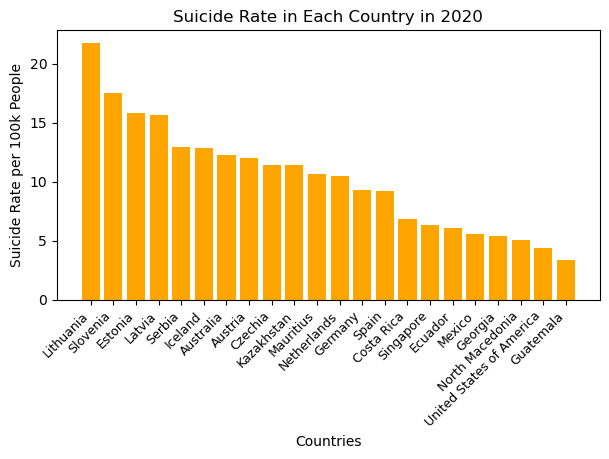

In [95]:
plt.figure(figsize=(7, 3.5))
plt.bar(Suicide_Rate['country'], Suicide_Rate['# Suicides Per 100k People'], color="orange")
plt.xlabel('Countries')
plt.ylabel('Suicide Rate per 100k People')
plt.title('Suicide Rate in Each Country in 2020')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.show()

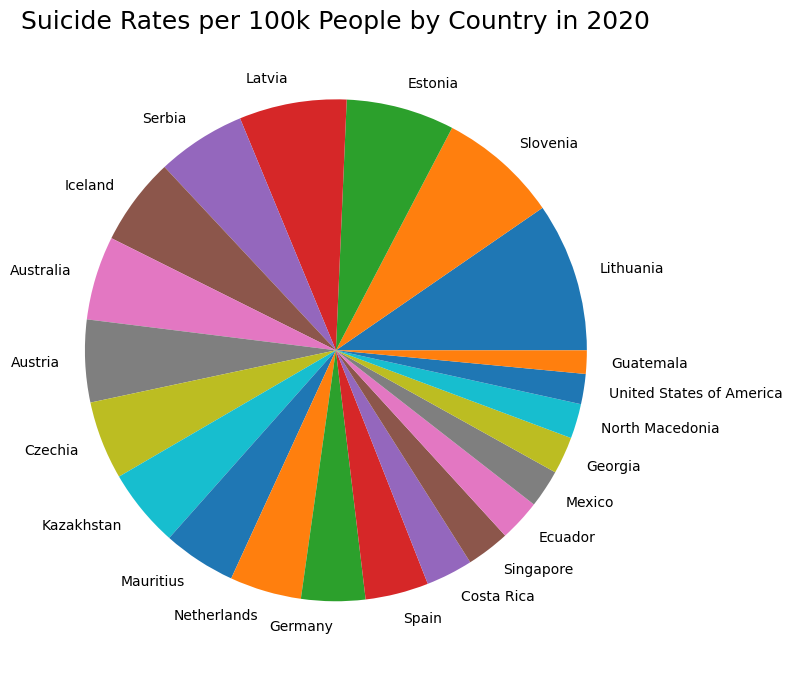

In [96]:
plt.figure(figsize=(8,8))
plt.pie(Suicide_Rate['# Suicides Per 100k People'], labels=Suicide_Rate['country'])
plt.tight_layout()
plt.title('Suicide Rates per 100k People by Country in 2020', fontsize=18)
plt.show()

# Household Income and Suicide Rate Analysis

In [97]:
Suicide_Rate_HDI

,country,suicides_no,population,Suicide rate,# Suicides Per 100k People,HDI for year
0,Lithuania,608.0,2794885.0,0.000218,21.754026,0.878919
1,Slovenia,368.0,2102419.0,0.000175,17.503647,0.910715
2,Estonia,210.0,1329522.0,0.000158,15.795150,0.890523
3,Latvia,298.0,1900449.0,0.000157,15.680505,0.869134
4,Serbia,895.0,6899126.0,0.000130,12.972658,0.803060
5,Iceland,47.0,366463.0,0.000128,12.825306,0.956801
6,Australia,3139.0,25655289.0,0.000122,12.235294,0.944670
7,Austria,1072.0,8916864.0,0.000120,12.022164,0.912505
8,Czechia,1224.0,10697858.0,0.000114,11.441543,0.890991
9,Kazakhstan,2144.0,18755666.0,0.000114,11.431212,0.812130


In [98]:
country_income

,Country,PPP GNI
0,Afghanistan,171.87
1,Albania,493.90
2,Argentina,514.35
3,Armenia,248.63
4,Austria,4753.41
...,...,...
59,United Kingdom,3189.75
60,United States,4502.19
61,Uruguay,879.92
62,Viet Nam,296.18


In [99]:
#change column names to match Suicide_Rate_HDI for merging later
country_income = country_income[["Country", "PPP GNI"]]
country_income = country_income.rename(columns={"Country": "country"})
country_income

,country,PPP GNI
0,Afghanistan,171.87
1,Albania,493.90
2,Argentina,514.35
3,Armenia,248.63
4,Austria,4753.41
...,...,...
59,United Kingdom,3189.75
60,United States,4502.19
61,Uruguay,879.92
62,Viet Nam,296.18


In [100]:
#original data has another name for United States, we unify it
Suicide_Rate_Cleaned = Suicide_Rate_HDI[["country", "Suicide rate", "# Suicides Per 100k People"]]
Suicide_Rate_Cleaned.loc[20,"country"] = "United States"
Suicide_Rate_Cleaned

,country,Suicide rate,# Suicides Per 100k People
0,Lithuania,0.000218,21.754026
1,Slovenia,0.000175,17.503647
2,Estonia,0.000158,15.795150
3,Latvia,0.000157,15.680505
4,Serbia,0.000130,12.972658
5,Iceland,0.000128,12.825306
6,Australia,0.000122,12.235294
7,Austria,0.000120,12.022164
8,Czechia,0.000114,11.441543
9,Kazakhstan,0.000114,11.431212


In [101]:
#merging suicide rate data and income data into the variable "comparison" to analyze the relationship of the two later
comparison = pd.merge(Suicide_Rate_Cleaned, country_income, on="country", how="left")
comparison

,country,Suicide rate,# Suicides Per 100k People,PPP GNI
0,Lithuania,0.000218,21.754026,1494.70
1,Slovenia,0.000175,17.503647,2621.78
2,Estonia,0.000158,15.795150,2193.45
3,Latvia,0.000157,15.680505,1671.16
4,Serbia,0.000130,12.972658,NaN
5,Iceland,0.000128,12.825306,NaN
6,Australia,0.000122,12.235294,NaN
7,Austria,0.000120,12.022164,4753.41
8,Czechia,0.000114,11.441543,1659.91
9,Kazakhstan,0.000114,11.431212,515.80


In [102]:
comparison.dtypes

country                        object
Suicide rate                  float64
# Suicides Per 100k People    float64
PPP GNI                        object
dtype: object

In [103]:
#change data type so we can sort by the numbers
comparison = comparison.dropna()
comparison["PPP GNI"] = comparison["PPP GNI"].astype("float")
comparison = comparison.sort_values("PPP GNI")
comparison = comparison.reset_index(drop=True)
comparison

,country,Suicide rate,# Suicides Per 100k People,PPP GNI
0,Mexico,0.000055,5.548487,328.05
1,Ecuador,0.000061,6.089173,472.23
2,Kazakhstan,0.000114,11.431212,515.80
3,Costa Rica,0.000069,6.851314,906.48
4,Lithuania,0.000218,21.754026,1494.70
5,Czechia,0.000114,11.441543,1659.91
6,Latvia,0.000157,15.680505,1671.16
7,Estonia,0.000158,15.795150,2193.45
8,Slovenia,0.000175,17.503647,2621.78
9,Spain,0.000092,9.223983,3000.21


In [104]:
xaxis = []
for i in range(15):
    xaxis.append(i)  
xaxis

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

* Compare the patterns of average income level and suicide rates:

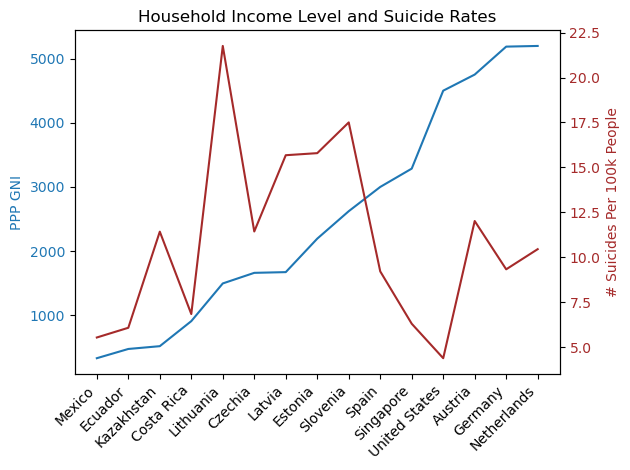

In [105]:
#create a double-y-axes line plot to compare patterns
#set two y-axes as household income index and suicide rate respectively
fig, fig1 = plt.subplots()
fig1.plot(comparison["PPP GNI"], color="#1f77b4")
fig2 = fig1.twinx()
fig2.plot(comparison["# Suicides Per 100k People"], color="brown")

fig1.set_xticks(xaxis)
fig1.set_xticklabels(comparison["country"], rotation=45, horizontalalignment = "right")
fig1.xaxis.set_label_coords(-0.5,0)

fig1.set_ylabel("PPP GNI", color="#1f77b4")
fig1.tick_params(axis="y", labelcolor="#1f77b4")

fig2.set_ylabel("# Suicides Per 100k People", color="brown")
fig2.tick_params(axis="y", labelcolor="brown")

plt.title("Household Income Level and Suicide Rates")
fig.tight_layout()
#plt.savefig("Data visualization/IncomeSI.png")
plt.show()

* Analyze the correlation between income and suicide rates, with r-values:

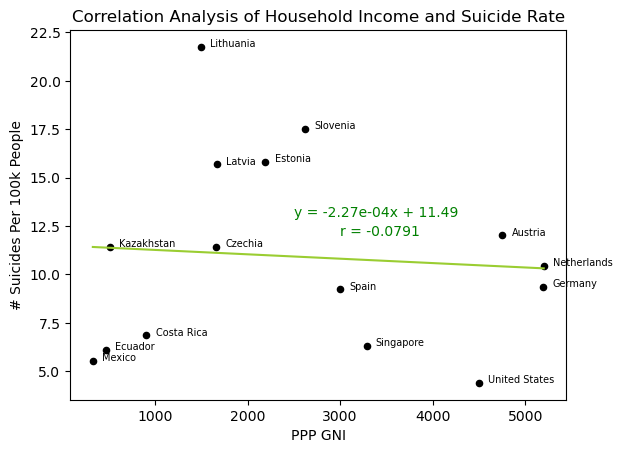

In [106]:
#create a scatter plot with household income index as x-axis, suicide rate as y-axis
comparison.plot(kind="scatter", x="PPP GNI", y="# Suicides Per 100k People", xlabel="PPP GNI", ylabel="# Suicides Per 100k People", color="black")
x = comparison["PPP GNI"]
y = comparison["# Suicides Per 100k People"]

#analyze the correlation between household income and suicide rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg = x * slope + intercept
plt.plot(x, reg, color="yellowgreen")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (2500, 13), color="green")
plt.annotate(f"r = {round(rvalue,4)}", (3000, 12), color="green")

#label each country
for index, row in comparison.iterrows():
    plt.text(row["PPP GNI"]+100, row["# Suicides Per 100k People"], row['country'], fontsize=7)

plt.title("Correlation Analysis of Household Income and Suicide Rate")
#plt.savefig("Data visualization/IncomeSiCorrelation.png")
plt.show()

# Human Development Index (HDI) and Suicide Rate Analysis

The original code in this section is written by Mason Wikoff (@masonwiki), but will be rewritten for conciseness.

In [107]:
hdi = Suicide_Rate_HDI
hdi

,country,suicides_no,population,Suicide rate,# Suicides Per 100k People,HDI for year
0,Lithuania,608.0,2794885.0,0.000218,21.754026,0.878919
1,Slovenia,368.0,2102419.0,0.000175,17.503647,0.910715
2,Estonia,210.0,1329522.0,0.000158,15.795150,0.890523
3,Latvia,298.0,1900449.0,0.000157,15.680505,0.869134
4,Serbia,895.0,6899126.0,0.000130,12.972658,0.803060
5,Iceland,47.0,366463.0,0.000128,12.825306,0.956801
6,Australia,3139.0,25655289.0,0.000122,12.235294,0.944670
7,Austria,1072.0,8916864.0,0.000120,12.022164,0.912505
8,Czechia,1224.0,10697858.0,0.000114,11.441543,0.890991
9,Kazakhstan,2144.0,18755666.0,0.000114,11.431212,0.812130


In [108]:
hdi = hdi.drop(['suicides_no','population','Suicide rate'], axis = 1)
hdi

,country,# Suicides Per 100k People,HDI for year
0,Lithuania,21.754026,0.878919
1,Slovenia,17.503647,0.910715
2,Estonia,15.795150,0.890523
3,Latvia,15.680505,0.869134
4,Serbia,12.972658,0.803060
5,Iceland,12.825306,0.956801
6,Australia,12.235294,0.944670
7,Austria,12.022164,0.912505
8,Czechia,11.441543,0.890991
9,Kazakhstan,11.431212,0.812130


* Analyze the corelation between HDI and suicide rate, with r-values:

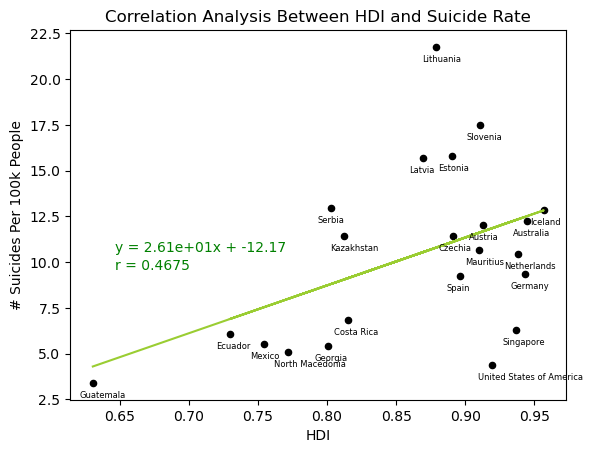

In [109]:
hdi.plot(kind="scatter", x='HDI for year', y="# Suicides Per 100k People", xlabel="HDI", ylabel="# Suicides Per 100k People", color="black")
x = hdi['HDI for year']
y = hdi['# Suicides Per 100k People']

#analyze the correlation between HDI and suicide rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg = x * slope + intercept
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", 
             xy=(0.09, 0.4), xycoords='axes fraction',
             textcoords='offset points', color="green")
plt.annotate(f"r = {round(rvalue,4)}", 
             xy=(0.09, 0.35), xycoords='axes fraction',
             textcoords='offset points', color="green")
plt.plot(x, reg, color='yellowgreen')
plt.title('Correlation Analysis Between HDI and Suicide Rate')

#label the countries
for i, row in hdi.iterrows():
    plt.text(row['HDI for year']- 0.01, row['# Suicides Per 100k People']- .8, row['country'], fontsize=6)

#plt.savefig('Data visualization/HDI_SR_Correlation.png')
plt.show()

# Generation and Suicide Rate Analysis

In [110]:
silent = pd.read_csv('Data/Cleaned up Datasets//Silent.csv')
genx = pd.read_csv('Data/Cleaned up Datasets//Generation X.csv')
gi = pd.read_csv('Data/Cleaned up Datasets//G.I. Generation.csv')
boomer = pd.read_csv('Data/Cleaned up Datasets//Boomers.csv')

In [111]:
silent

,generation,country,suicides_no,suicides/100k pop
0,Silent,Australia,1118.0,4.357776
1,Silent,Austria,277.0,3.106473
2,Silent,Costa Rica,120.0,2.342330
3,Silent,Czechia,396.0,3.701676
4,Silent,Ecuador,272.0,1.546457
5,Silent,Estonia,57.0,4.287255
6,Silent,Georgia,66.0,1.772899
7,Silent,Germany,2080.0,2.501176
8,Silent,Guatemala,145.0,0.860109
9,Silent,Iceland,12.0,3.274546


In [112]:
#Drop unneccesary columns to clean up data. 
#In this case we already know what generation each CSV is, so we dont need the column.
silent = silent.drop(['generation'], axis=1)
genx = genx.drop(['generation'], axis=1)
gi = gi.drop(['generation'], axis=1)
boomer = boomer.drop(['generation'], axis=1)

* Below we visualize the suicide rates in each country separated by genereation:

1. Silent generation

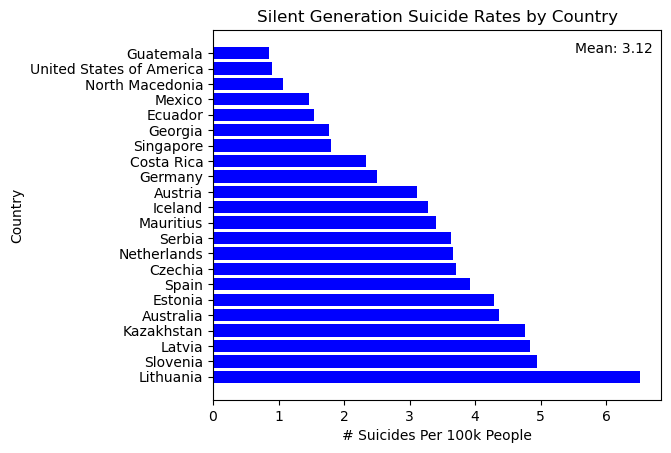

In [113]:
#Calculate the mean suicide rates for each generation
mean_silent = silent['suicides/100k pop'].mean()

#Sort the data by suicide rates to visualize the data better
silent_sorted = silent.sort_values(by='suicides/100k pop', ascending=False)

#Using a bar graph will best illustrate data since we are only comparing suicides
plt.barh(y=silent_sorted['country'], width=silent_sorted['suicides/100k pop'], color='blue')
plt.ylabel('Country')
plt.xlabel('# Suicides Per 100k People')

#Display the mean suicide rate for this generation
plt.text(x=mean_silent +2.4, y=len(silent_sorted)-1, s=f"Mean: {mean_silent:.2f}")
plt.title('Silent Generation Suicide Rates by Country')
plt.subplots_adjust(left=0.2) #Avoid cutting off the chart by moving the border to the left
#plt.savefig("Data visualization/Silent_Gen.png", bbox_inches='tight')

plt.show()

2. Gen X

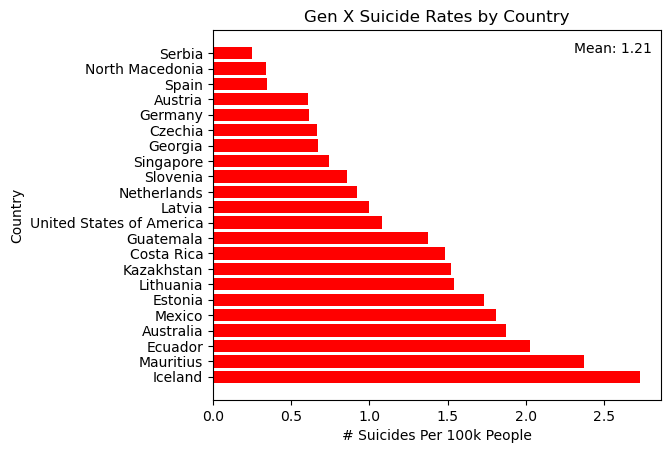

In [114]:
mean_genx = genx['suicides/100k pop'].mean()

genx_sorted = genx.sort_values(by='suicides/100k pop', ascending=False)

plt.barh(y=genx_sorted['country'], width=genx_sorted['suicides/100k pop'], color='red')
plt.ylabel('Country')
plt.xlabel('# Suicides Per 100k People')
plt.text(x=mean_genx +1.1, y=len(genx_sorted)-1, s=f"Mean: {mean_genx:.2f}")
plt.title('Gen X Suicide Rates by Country')
plt.subplots_adjust(left=0.2)
#plt.savefig("Data visualization/Gen_X.png", bbox_inches='tight')

plt.show()

3. G. I. generation

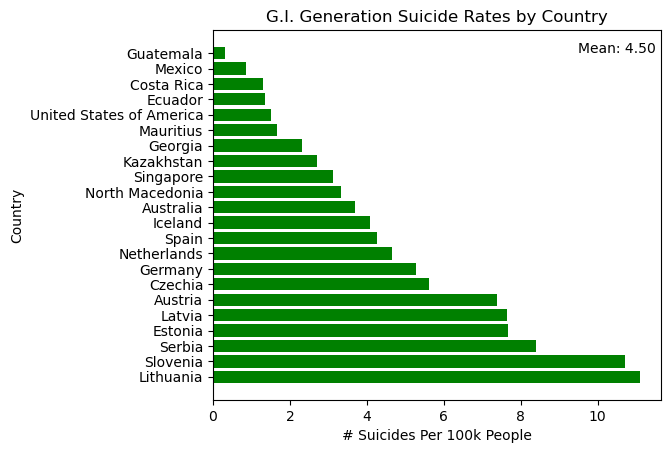

In [115]:
mean_GI = gi['suicides/100k pop'].mean()

gi_sorted = gi.sort_values(by='suicides/100k pop', ascending=False)

plt.barh(y=gi_sorted['country'], width=gi_sorted['suicides/100k pop'], color='green')
plt.ylabel('Country')
plt.xlabel('# Suicides Per 100k People')
plt.text(x=mean_GI +5, y=len(gi_sorted)-1, s=f"Mean: {mean_GI:.2f}")
plt.title('G.I. Generation Suicide Rates by Country')
plt.subplots_adjust(left=0.2)
#plt.savefig("Data visualization/GI_Gen.png", bbox_inches='tight')

plt.show()

4. Baby boomers

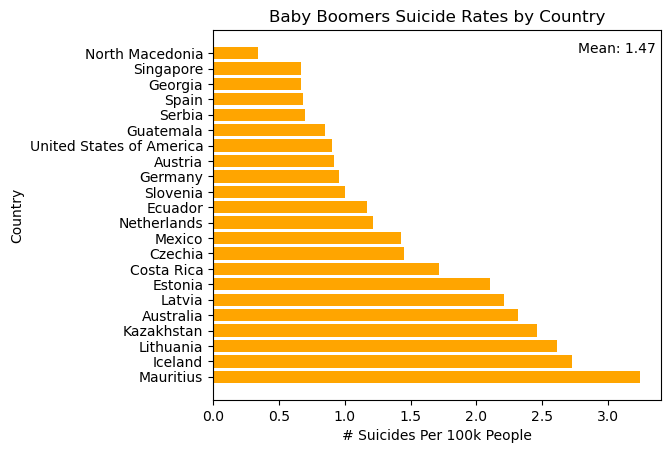

In [116]:
mean_boomer = boomer['suicides/100k pop'].mean()

boomer_sorted = boomer.sort_values(by='suicides/100k pop', ascending=False)

plt.barh(y=boomer_sorted['country'], width=boomer_sorted['suicides/100k pop'], color='orange')
plt.ylabel('Country')
plt.xlabel('# Suicides Per 100k People')
plt.text(x=mean_boomer +1.3, y=len(boomer_sorted)-1, s=f"Mean: {mean_boomer:.2f}")
plt.title('Baby Boomers Suicide Rates by Country')
plt.subplots_adjust(left=0.2)
#plt.savefig("Data visualization/Baby_Boomer.png", bbox_inches='tight')

plt.show()

# Gender and Suicide Rate Analysis
The original code in this section is written by Fredritz Cabrera (@FredritzNCabrera), but some of it will be rewritten and commented again below for my own benefit and understanding. The codes that I omit will be commented out.

In [117]:
suicide_rates_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
27823,Australia,2020,male,5-14 years,15.0,25655289,0.058467,0.960859,51692.842750,Generation X
27824,Austria,2020,male,5-14 years,2.0,8916864,0.022429,0.921971,48586.801320,Generation X
27834,Costa Rica,2020,male,5-14 years,1.0,5123105,0.019519,0.817895,12140.854150,Generation X
27838,Czechia,2020,male,5-14 years,3.0,10697858,0.028043,0.896591,22931.274600,Generation X
27841,Ecuador,2020,male,5-14 years,44.0,17588595,0.250162,0.737612,5600.389615,Generation X
...,...,...,...,...,...,...,...,...,...,...
31493,Serbia,2020,female,75+ years,62.0,6899126,0.898665,0.796845,7720.510572,G.I. Generation
31495,Singapore,2020,female,75+ years,18.0,5685807,0.316578,0.931806,59797.752180,G.I. Generation
31497,Slovenia,2020,female,75+ years,24.0,2102419,1.141542,0.908508,25517.330670,G.I. Generation
31499,Spain,2020,female,75+ years,182.0,47365655,0.384245,0.889149,27063.193920,G.I. Generation


In [118]:
# separate male and female suicide rates
male_suicide_rates_df = suicide_rates_df[suicide_rates_df['sex'] == 'male']
female_suicide_rates_df = suicide_rates_df[suicide_rates_df['sex'] == 'female']

# calculate suicide rates per 100k people for both sexes
male_suicide_rates_df['suicide_rate_per_100k'] = male_suicide_rates_df['suicides_no'] / male_suicide_rates_df['population'] * 100000
female_suicide_rates_df['suicide_rate_per_100k'] = female_suicide_rates_df['suicides_no'] / female_suicide_rates_df['population'] * 100000

# sort by suicide rate
male_suicide_rates_df = male_suicide_rates_df.sort_values(by='suicide_rate_per_100k', ascending=False)
female_suicide_rates_df = female_suicide_rates_df.sort_values(by='suicide_rate_per_100k', ascending=False)

In [119]:
male_suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation,suicide_rate_per_100k
29175,Lithuania,2020,male,55-74 years,159.0,2794885,5.688964,0.866827,20233.64135,G.I. Generation,5.688964
28847,Lithuania,2020,male,35-54 years,155.0,2794885,5.545845,0.866827,20233.64135,Silent,5.545845
29201,Slovenia,2020,male,55-74 years,98.0,2102419,4.661297,0.912922,25517.33067,G.I. Generation,4.661297
28873,Slovenia,2020,male,35-54 years,88.0,2102419,4.185655,0.912922,25517.33067,Silent,4.185655
28842,Kazakhstan,2020,male,35-54 years,781.0,18755666,4.164075,0.810741,9122.23343,Silent,4.164075


In [120]:
female_suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation,suicide_rate_per_100k
31143,Lithuania,2020,female,55-74 years,49.0,2794885,1.753203,0.891011,20233.641350,G.I. Generation,1.753203
31471,Lithuania,2020,female,75+ years,39.0,2794885,1.395406,0.891011,20233.641350,G.I. Generation,1.395406
31132,Iceland,2020,female,55-74 years,5.0,366463,1.364394,0.945473,59270.180050,G.I. Generation,1.364394
31169,Slovenia,2020,female,55-74 years,28.0,2102419,1.331799,0.908508,25517.330670,G.I. Generation,1.331799
31165,Serbia,2020,female,55-74 years,84.0,6899126,1.217546,0.796845,7720.510572,G.I. Generation,1.217546


In [121]:
# get a list of the countries
countries = male_suicide_rates_df['country'].tolist()
#countries = list(male_suicide_rates_df['country'])
countries

['Lithuania',
 'Lithuania',
 'Slovenia',
 'Slovenia',
 'Kazakhstan',
 'Latvia',
 'Serbia',
 'Latvia',
 'Estonia',
 'Slovenia',
 'Austria',
 'Estonia',
 'Australia',
 'Czechia',
 'Mauritius',
 'Spain',
 'Czechia',
 'Mauritius',
 'Serbia',
 'Iceland',
 'Netherlands',
 'Austria',
 'Serbia',
 'Lithuania',
 'Lithuania',
 'Netherlands',
 'Austria',
 'Iceland',
 'Estonia',
 'Kazakhstan',
 'Australia',
 'Latvia',
 'Latvia',
 'North Macedonia',
 'Estonia',
 'Iceland',
 'Spain',
 'Costa Rica',
 'Kazakhstan',
 'Germany',
 'Germany',
 'Germany',
 'Australia',
 'Singapore',
 'Mauritius',
 'Georgia',
 'Czechia',
 'Iceland',
 'Australia',
 'Mauritius',
 'Ecuador',
 'Costa Rica',
 'Singapore',
 'Georgia',
 'Spain',
 'Lithuania',
 'Czechia',
 'Ecuador',
 'Mexico',
 'Mexico',
 'Mexico',
 'Costa Rica',
 'Estonia',
 'Ecuador',
 'Costa Rica',
 'Kazakhstan',
 'Slovenia',
 'Latvia',
 'Ecuador',
 'Netherlands',
 'North Macedonia',
 'Guatemala',
 'Netherlands',
 'Australia',
 'Germany',
 'Slovenia',
 'Austria'

* Get a general idea of how the data looks like by ploting male and female suicide rates together.
* Can see the contribution of each gender as well as the comparison among the countries:

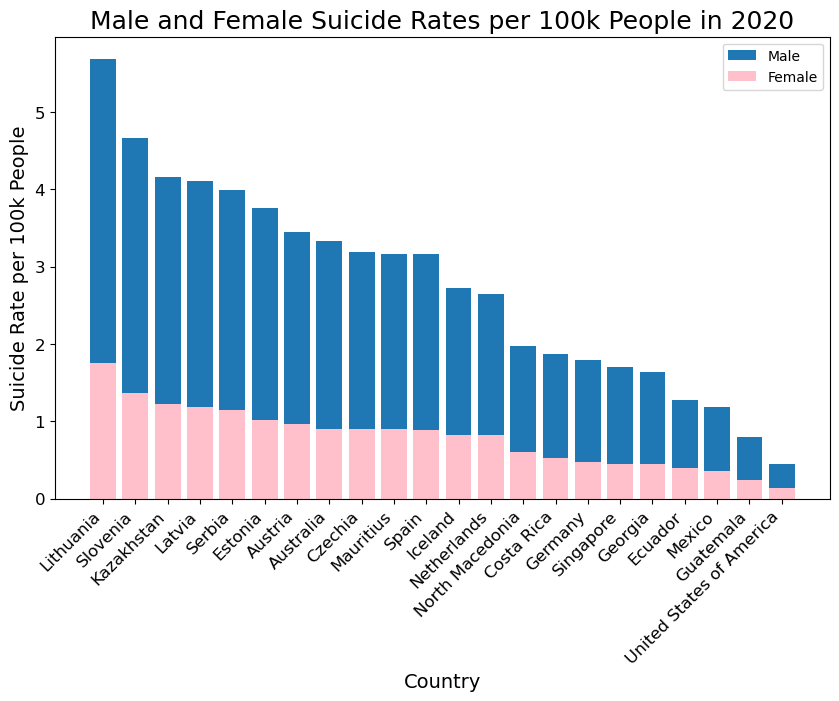

In [122]:
# create a bar graph for male and female suicide rates in one graph
plt.figure(figsize=(10, 6))
plt.bar(countries, male_suicide_rates_df['suicide_rate_per_100k'], label='Male')
plt.bar(countries, female_suicide_rates_df['suicide_rate_per_100k'], label='Female', color='pink')
#plt.xticks(rotation=90, fontsize=12)
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(fontsize=12)
plt.xlabel('Country', fontsize=14)
#plt.ylabel('Suicide Rate per 100k Population', fontsize=14)
#plt.title('Male and Female Suicide Rates per 100k Population in 2020', fontsize=18)
plt.ylabel('Suicide Rate per 100k People', fontsize=14)
plt.title('Male and Female Suicide Rates per 100k People in 2020', fontsize=18)
plt.legend()
plt.show()

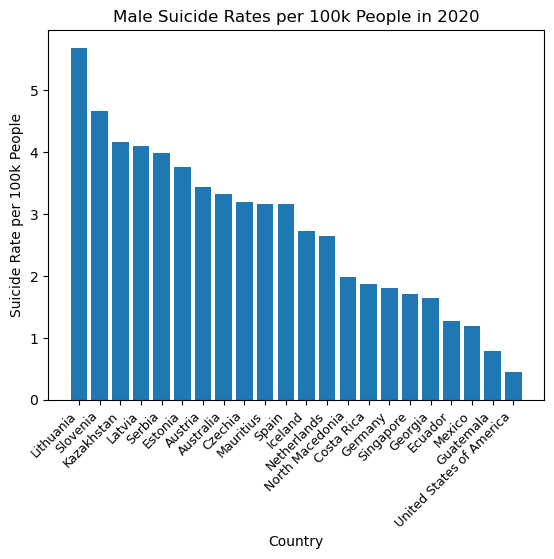

In [123]:
# create bar chart for a separate male suicide rates
plt.bar(male_suicide_rates_df['country'], male_suicide_rates_df['suicide_rate_per_100k'])
#plt.xticks(rotation=90)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.title('Male Suicide Rates per 100k People in 2020')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k People')
plt.show()

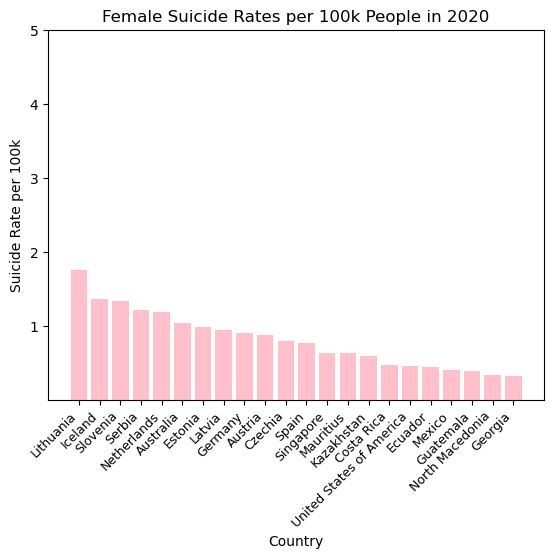

In [124]:
# create bar chart for a separate female suicide rates
plt.bar(female_suicide_rates_df['country'], female_suicide_rates_df['suicide_rate_per_100k'],color='pink')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.title('Female Suicide Rates per 100k People in 2020')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.yticks(range(1,6)) #make the y range the same as the male version so the comparison is easier to be nade
plt.show()

In [125]:
# Group data by country and gender
grouped_data = suicide_rates_df.groupby(['country', 'sex']).sum()
grouped_data = pd.DataFrame(grouped_data['suicides_no'])
grouped_data = grouped_data.reset_index()
grouped_data.head()


,country,sex,suicides_no
0,Australia,female,755.0
1,Australia,male,2384.0
2,Austria,female,234.0
3,Austria,male,838.0
4,Costa Rica,female,74.0


In [126]:
# Pivot data to create separate columns for male and female suicide rates
# set index based on country, columns based on sex, and the correspoding suicide_no to the values
pivoted_data = grouped_data.pivot(index='country', columns='sex', values='suicides_no')
# assign new column names
pivoted_data.columns = ['female_suicides', 'male_suicides']
pivoted_data

,female_suicides,male_suicides
country,,
Australia,755.0,2384.0
Austria,234.0,838.0
Costa Rica,74.0,277.0
Czechia,215.0,1009.0
Ecuador,219.0,852.0
Estonia,46.0,164.0
Georgia,31.0,171.0
Germany,2269.0,5497.0
Guatemala,169.0,405.0


* Look at male and female suicide rates side by side:

<Figure size 2000x700 with 0 Axes>

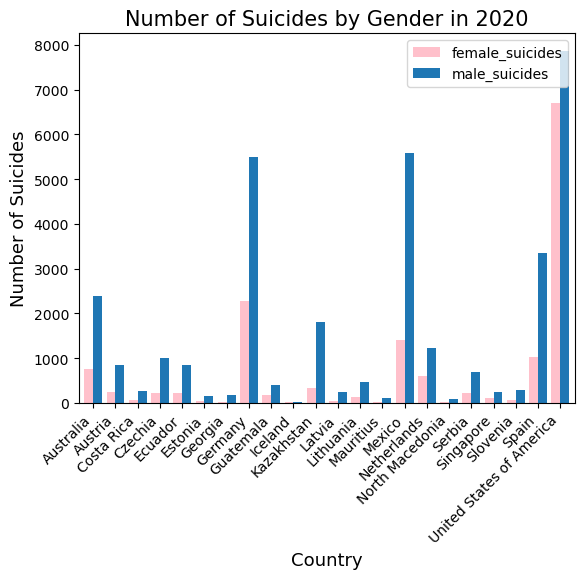

In [128]:
# Create bar chart
#fig, ax = plt.subplots(figsize=(10,7))
#pivoted_data.plot(kind='bar', ax=ax)
plt.figure(figsize=(20, 7))
pivoted_data.plot(kind='bar', color=["pink", "#1f77b4"], width=0.8)
plt.xticks(rotation=45, ha="right", fontsize=10)
#plt.xlabel('Country',fontsize=15)
#plt.ylabel('Number of Suicides',fontsize=15)
plt.xlabel('Country',fontsize=13)
plt.ylabel('Number of Suicides',fontsize=13)
plt.title('Number of Suicides by Gender in 2020',fontsize=15)
plt.legend(loc='upper right')
plt.show()

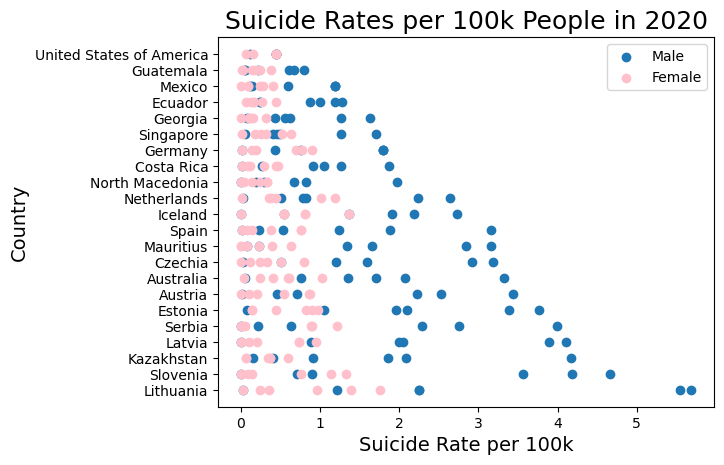

In [1033]:
# create scatter plot for male and female suicide rates
plt.scatter(male_suicide_rates_df['suicide_rate_per_100k'], male_suicide_rates_df['country'], label='Male',color='#1f77b4')
plt.scatter(female_suicide_rates_df['suicide_rate_per_100k'], female_suicide_rates_df['country'], label='Female',color='pink')
plt.legend()
plt.title('Suicide Rates per 100k People in 2020',fontsize=18)
#plt.xlabel('Suicide Rate per 100k',fontsize=18)
#plt.ylabel('Country',fontsize=18)
plt.xlabel('Suicide Rate per 100k',fontsize=14)
plt.ylabel('Country',fontsize=14)
plt.show()

* Comparison of genders regardless of country:

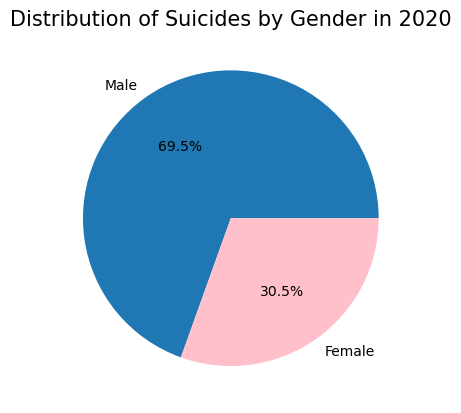

In [1034]:
# create pie chart for male and female suicide rates
labels = ['Male', 'Female']
male_total_suicides = male_suicide_rates_df['suicides_no'].sum()
female_total_suicides = female_suicide_rates_df['suicides_no'].sum()
sizes = [male_total_suicides, female_total_suicides]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#1f77b4','pink'])
plt.title('Distribution of Suicides by Gender in 2020',fontsize=15)
plt.show()

* Gender comparison within different generations:

In [1035]:
generations = ['Silent', 'G.I. Generation', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']
colors = ['#1f77b4', 'pink']
for generation in generations:
    generation_suicide_rates_df = suicide_rates_df[suicide_rates_df['generation'] == generation]
    print(pd.DataFrame(generation_suicide_rates_df))

                        country  year     sex          age  suicides_no  \
28807                 Australia  2020    male  35-54 years        853.0   
28808                   Austria  2020    male  35-54 years        199.0   
28818                Costa Rica  2020    male  35-54 years         96.0   
28822                   Czechia  2020    male  35-54 years        341.0   
28825                   Ecuador  2020    male  35-54 years        224.0   
28828                   Estonia  2020    male  35-54 years         45.0   
28830                   Georgia  2020    male  35-54 years         61.0   
28831                   Germany  2020    male  35-54 years       1495.0   
28834                 Guatemala  2020    male  35-54 years        114.0   
28836                   Iceland  2020    male  35-54 years         10.0   
28842                Kazakhstan  2020    male  35-54 years        781.0   
28845                    Latvia  2020    male  35-54 years         78.0   
28847                 Lit

In [1036]:
# check to see which generations are actually present in the data
suicide_rates_df["generation"].unique()

array(['Generation X', 'Boomers', 'Silent', 'G.I. Generation'],
      dtype=object)

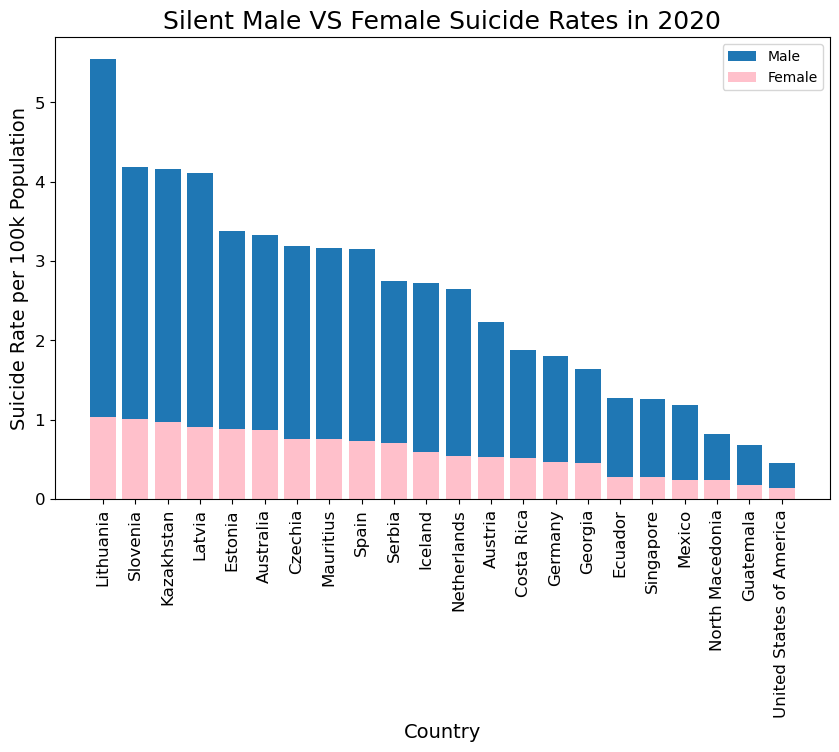

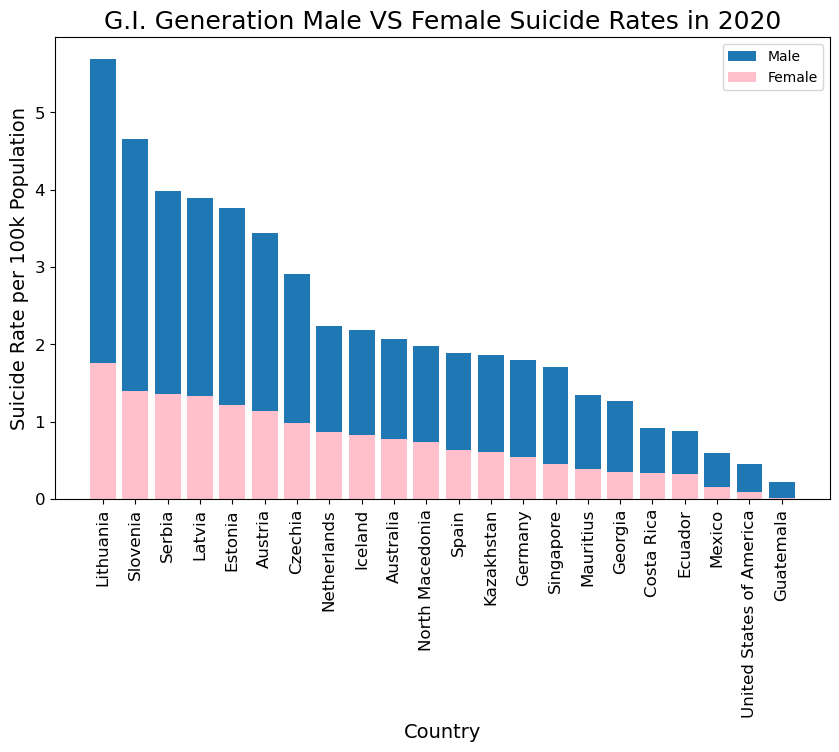

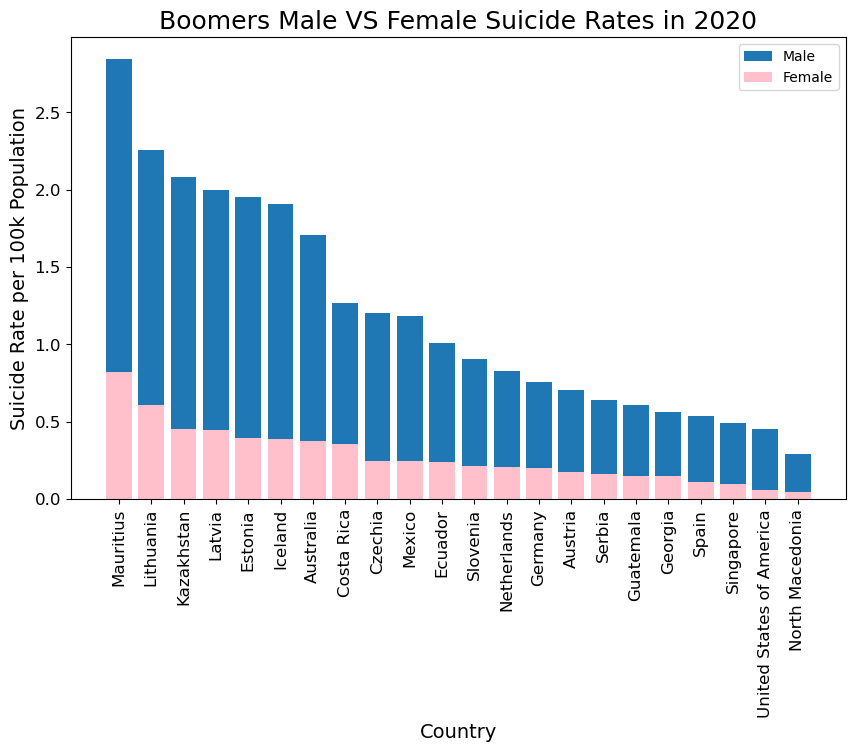

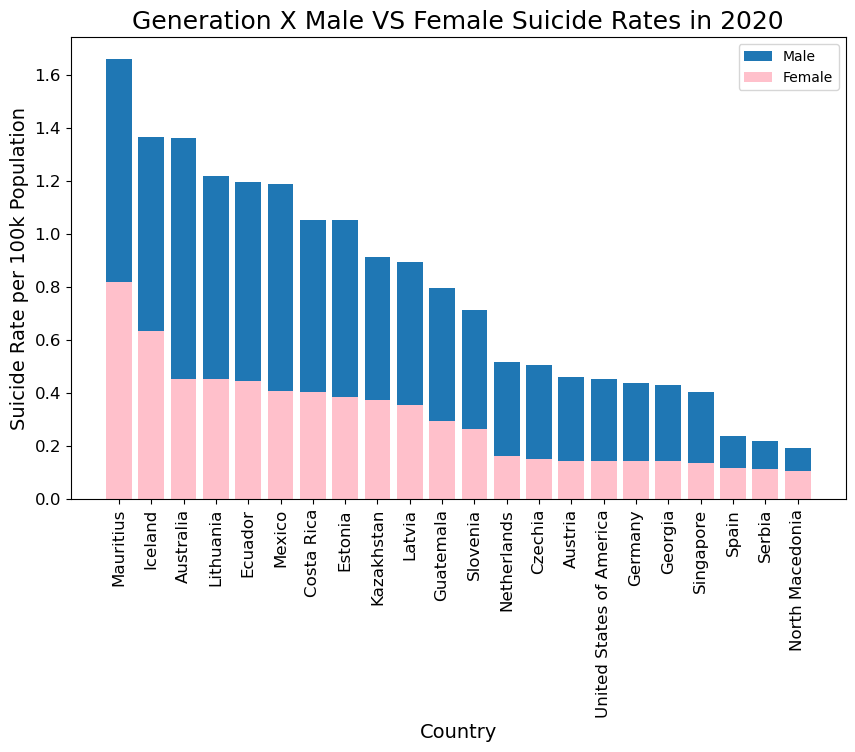

In [1037]:
# separate male and female suicide rates by generation
generations = ['Silent', 'G.I. Generation', 'Boomers', 'Generation X']
colors = ['#1f77b4', 'pink']
for generation in generations:
    generation_suicide_rates_df = suicide_rates_df[suicide_rates_df['generation'] == generation]
    male_suicide_rates_df = generation_suicide_rates_df[generation_suicide_rates_df['sex'] == 'male']
    female_suicide_rates_df = generation_suicide_rates_df[generation_suicide_rates_df['sex'] == 'female']
    # calculate suicide rates per 100k people
    male_suicide_rates_df['suicide_rate_per_100k'] = male_suicide_rates_df['suicides_no'] / male_suicide_rates_df['population'] * 100000
    female_suicide_rates_df['suicide_rate_per_100k'] = female_suicide_rates_df['suicides_no'] / female_suicide_rates_df['population'] * 100000
    # sort by suicide rate
    male_suicide_rates_df = male_suicide_rates_df.sort_values(by='suicide_rate_per_100k', ascending=False)
    female_suicide_rates_df = female_suicide_rates_df.sort_values(by='suicide_rate_per_100k', ascending=False)
    # get a list of the countries
    countries = male_suicide_rates_df['country'].tolist()
    # create a bar graph for male and female suicide rates
    plt.figure(figsize=(10, 6))
    plt.bar(countries, male_suicide_rates_df['suicide_rate_per_100k'], label='Male', color=colors[0])
    plt.bar(countries, female_suicide_rates_df['suicide_rate_per_100k'], label='Female', color=colors[1])
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Suicide Rate per 100k Population', fontsize=14)
    plt.title(generation + ' Male VS Female Suicide Rates in 2020', fontsize=18)
    plt.legend()
    plt.show()

# Mental Disorder Data Cleanup

In [1038]:
mentaldisorder = pd.read_csv("Data/Resource Datasets/Mental health Depression disorder Data.csv")
mentaldisorder

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.6036,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.7693,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.5072,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.3538,NaN,NaN,NaN,NaN,NaN,NaN


In [1039]:
mentaldisorder = mentaldisorder.loc[mentaldisorder["Year"]=="2017"]
del mentaldisorder["index"]
mentaldisorder = mentaldisorder.dropna()
del mentaldisorder["Code"]
del mentaldisorder["Year"]
mentaldisorder = mentaldisorder.drop(6383) #delete the row "world"
mentaldisorder

,Entity,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
27,Afghanistan,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
55,Albania,0.201025,0.70448,0.174046,3.385245,0.517614,2.208414,1.837955
83,Algeria,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
111,American Samoa,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
167,Andorra,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050
...,...,...,...,...,...,...,...,...
6243,Venezuela,0.205537,0.779803,0.28269,2.866789,0.645770,2.814584,1.370216
6271,Vietnam,0.244663,0.552653,0.128466,2.066871,0.693534,2.879450,1.739466
6411,Yemen,0.171691,0.735682,0.132623,4.857207,1.414725,4.012346,0.634413
6439,Zambia,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243


In [1040]:
mentaldisorder = mentaldisorder.reset_index(drop=True)
mentaldisorder = mentaldisorder.rename(columns={"Entity": "country"})
mentaldisorder

,country,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Albania,0.201025,0.70448,0.174046,3.385245,0.517614,2.208414,1.837955
2,Algeria,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
3,American Samoa,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
4,Andorra,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050
...,...,...,...,...,...,...,...,...
190,Venezuela,0.205537,0.779803,0.28269,2.866789,0.645770,2.814584,1.370216
191,Vietnam,0.244663,0.552653,0.128466,2.066871,0.693534,2.879450,1.739466
192,Yemen,0.171691,0.735682,0.132623,4.857207,1.414725,4.012346,0.634413
193,Zambia,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243


In [1041]:
comparison

,country,Suicide rate,# Suicides Per 100k People,PPP GNI
0,Mexico,0.000055,5.548487,328.05
1,Ecuador,0.000061,6.089173,472.23
2,Kazakhstan,0.000114,11.431212,515.80
3,Costa Rica,0.000069,6.851314,906.48
4,Lithuania,0.000218,21.754026,1494.70
5,Czechia,0.000114,11.441543,1659.91
6,Latvia,0.000157,15.680505,1671.16
7,Estonia,0.000158,15.795150,2193.45
8,Slovenia,0.000175,17.503647,2621.78
9,Spain,0.000092,9.223983,3000.21


In [1042]:
income_mental_disorder = pd.merge(comparison, mentaldisorder, on="country", how="left")
income_mental_disorder = income_mental_disorder.dropna()
income_mental_disorder = income_mental_disorder.reset_index(drop=True)
income_mental_disorder

,country,Suicide rate,# Suicides Per 100k People,PPP GNI,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Mexico,0.000055,5.548487,328.05,0.211765,0.818921,0.316975,3.186326,0.820863,2.788807,1.729604
1,Ecuador,0.000061,6.089173,472.23,0.202912,0.882945,0.363733,4.305357,0.668946,2.977117,1.706748
2,Kazakhstan,0.000114,11.431212,515.80,0.199892,0.667338,0.227918,2.607806,0.605455,3.511775,3.369006
3,Costa Rica,0.000069,6.851314,906.48,0.21389,0.843753,0.289342,2.936829,0.778956,2.904788,1.472594
4,Lithuania,0.000218,21.754026,1494.70,0.200982,0.700278,0.234095,2.937224,0.631073,4.143254,4.428001
5,Latvia,0.000157,15.680505,1671.16,0.19951,0.696349,0.225275,2.944950,1.041688,3.499571,4.408781
6,Estonia,0.000158,15.795150,2193.45,0.203978,0.708241,0.250271,2.962244,1.126665,3.848854,4.713617
7,Slovenia,0.000175,17.503647,2621.78,0.211824,0.725343,0.239636,3.449773,0.906052,2.863278,2.246827
8,Spain,0.000092,9.223983,3000.21,0.281539,0.976917,0.730626,5.280279,1.468868,3.538359,0.885003
9,Singapore,0.000063,6.313967,3286.12,0.27409,0.730592,0.553712,3.730467,0.914669,3.438271,0.491369


In [1043]:
#check data type to ensure the numbers are the correct data type
income_mental_disorder.dtypes

country                        object
Suicide rate                  float64
# Suicides Per 100k People    float64
PPP GNI                       float64
Schizophrenia (%)              object
Bipolar disorder (%)           object
Eating disorders (%)           object
Anxiety disorders (%)         float64
Drug use disorders (%)        float64
Depression (%)                float64
Alcohol use disorders (%)     float64
dtype: object

In [1044]:
income_mental_disorder["Schizophrenia (%)"] = income_mental_disorder["Schizophrenia (%)"].astype(float)
income_mental_disorder["Bipolar disorder (%)"] = income_mental_disorder["Bipolar disorder (%)"].astype(float)
income_mental_disorder["Eating disorders (%)"] = income_mental_disorder["Eating disorders (%)"].astype(float)
income_mental_disorder.dtypes

country                        object
Suicide rate                  float64
# Suicides Per 100k People    float64
PPP GNI                       float64
Schizophrenia (%)             float64
Bipolar disorder (%)          float64
Eating disorders (%)          float64
Anxiety disorders (%)         float64
Drug use disorders (%)        float64
Depression (%)                float64
Alcohol use disorders (%)     float64
dtype: object

In [1045]:
income_mental_disorder = income_mental_disorder
income_mental_disorder = income_mental_disorder.drop(["Suicide rate", "# Suicides Per 100k People"], axis=1)
income_mental_disorder

,country,PPP GNI,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Mexico,328.05,0.211765,0.818921,0.316975,3.186326,0.820863,2.788807,1.729604
1,Ecuador,472.23,0.202912,0.882945,0.363733,4.305357,0.668946,2.977117,1.706748
2,Kazakhstan,515.80,0.199892,0.667338,0.227918,2.607806,0.605455,3.511775,3.369006
3,Costa Rica,906.48,0.213890,0.843753,0.289342,2.936829,0.778956,2.904788,1.472594
4,Lithuania,1494.70,0.200982,0.700278,0.234095,2.937224,0.631073,4.143254,4.428001
5,Latvia,1671.16,0.199510,0.696349,0.225275,2.944950,1.041688,3.499571,4.408781
6,Estonia,2193.45,0.203978,0.708241,0.250271,2.962244,1.126665,3.848854,4.713617
7,Slovenia,2621.78,0.211824,0.725343,0.239636,3.449773,0.906052,2.863278,2.246827
8,Spain,3000.21,0.281539,0.976917,0.730626,5.280279,1.468868,3.538359,0.885003
9,Singapore,3286.12,0.274090,0.730592,0.553712,3.730467,0.914669,3.438271,0.491369


# Household Income and Mental Disorders Analysis

In [1046]:
#set the number of x ticks
xaxis = []
for i in range (14):
    xaxis.append(i)
xaxis

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

* Display the pattern between houshold income and mental disorder prevalance for each mental illness:

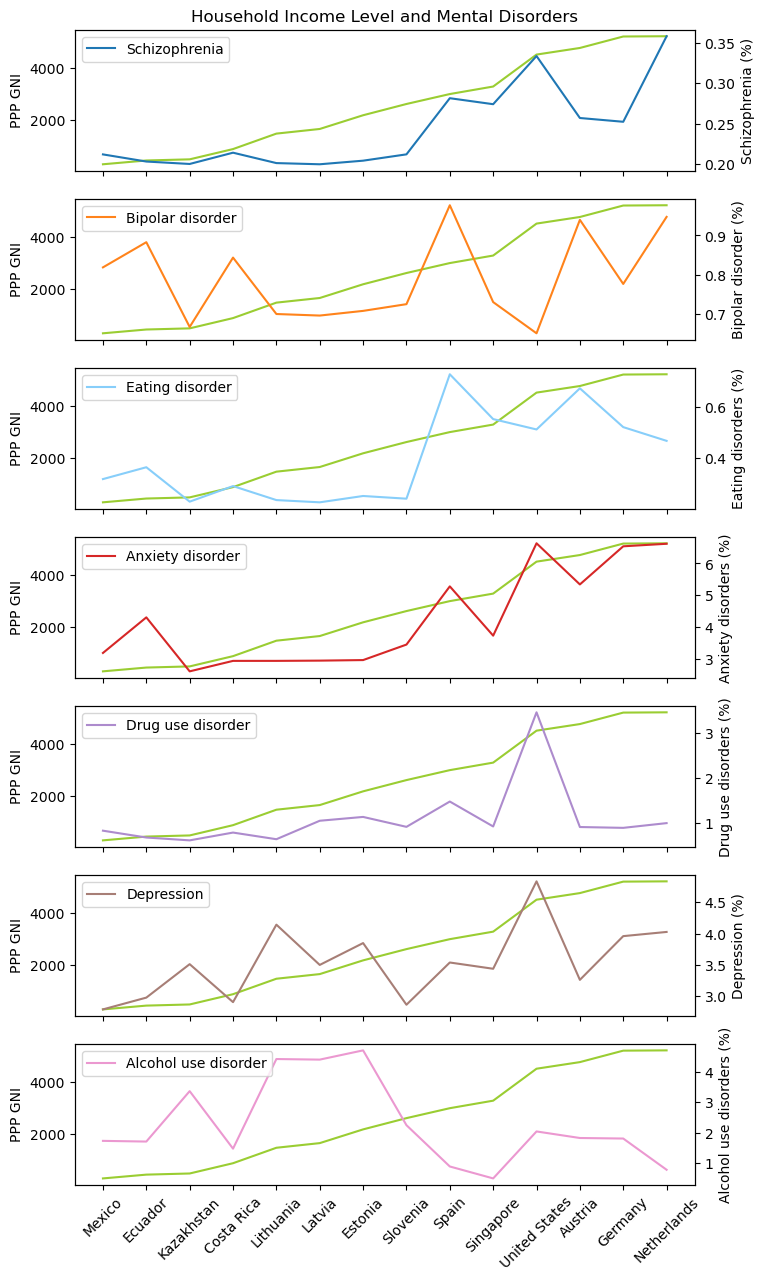

In [1050]:
fig, (fig1, fig3, fig5, fig7, fig9, fig11, fig13) = plt.subplots(7, sharex=True, sharey=True, figsize=(8, 15))

fig1.plot(income_mental_disorder["PPP GNI"], color="yellowgreen")
fig1.set_xticks(xaxis)
fig1.set_xticklabels(income_mental_disorder["country"], rotation = 45)
fig1.set_ylabel("PPP GNI")
fig2 = fig1.twinx()
fig2.set_ylabel("Schizophrenia (%)")
fig2.plot(income_mental_disorder["Schizophrenia (%)"])
plt.title("Household Income Level and Mental Disorders")
plt.legend(["Schizophrenia"], loc="best")

fig3.plot(income_mental_disorder["PPP GNI"], color="yellowgreen")
fig3.set_xticks(xaxis)
fig3.set_xticklabels(income_mental_disorder["country"], rotation = 45)
fig3.set_ylabel("PPP GNI")
fig4 = fig3.twinx()
fig4.set_ylabel("Bipolar disorder (%)")
fig4.plot(income_mental_disorder["Bipolar disorder (%)"], color="#FF831B")
plt.legend(['Bipolar disorder'], loc="best")

fig5.plot(income_mental_disorder["PPP GNI"], color="yellowgreen")
fig5.set_xticks(xaxis)
fig5.set_xticklabels(income_mental_disorder["country"], rotation = 45)
fig5.set_ylabel("PPP GNI")
fig6 = fig5.twinx()
fig6.set_ylabel("Eating disorders (%)")
fig6.plot(income_mental_disorder["Eating disorders (%)"], color="lightskyblue")
plt.legend(['Eating disorder'], loc="best")

fig7.plot(income_mental_disorder["PPP GNI"], color="yellowgreen")
fig7.set_xticks(xaxis)
fig7.set_xticklabels(income_mental_disorder["country"], rotation = 45)
fig7.set_ylabel("PPP GNI")
fig8 = fig7.twinx()
fig8.set_ylabel("Anxiety disorders (%)")
fig8.plot(income_mental_disorder["Anxiety disorders (%)"], color="#D62727")
plt.legend(['Anxiety disorder'], loc="best")

fig9.plot(income_mental_disorder["PPP GNI"], color="yellowgreen")
fig9.set_xticks(xaxis)
fig9.set_xticklabels(income_mental_disorder["country"], rotation = 45)
fig9.set_ylabel("PPP GNI")
fig10 = fig9.twinx()
fig10.set_ylabel("Drug use disorders (%)")
fig10.plot(income_mental_disorder["Drug use disorders (%)"], color="#AD8BCD")
plt.legend(['Drug use disorder'], loc="best")

fig11.plot(income_mental_disorder["PPP GNI"], color="yellowgreen")
fig11.set_xticks(xaxis)
fig11.set_xticklabels(income_mental_disorder["country"], rotation = 45)
fig11.set_ylabel("PPP GNI")
fig12 = fig11.twinx()
fig12.set_ylabel("Depression (%)")
fig12.plot(income_mental_disorder["Depression (%)"], color="#A77E76")
plt.legend(['Depression'], loc="upper left")

fig13.plot(income_mental_disorder["PPP GNI"], color="yellowgreen")
fig13.set_xticks(xaxis)
fig13.set_xticklabels(income_mental_disorder["country"], rotation = 45)
fig13.set_ylabel("PPP GNI")
fig14 = fig13.twinx()
fig14.set_ylabel("Alcohol use disorders (%)")
fig14.plot(income_mental_disorder["Alcohol use disorders (%)"], color="#EB98D0")
plt.legend(['Alcohol use disorder'], loc="upper left")

#plt.savefig("Data visualization/Household Income Level and Mental Disorders.png")
plt.show()

* Analyze the correlation between houshold income and mental illness prevalance, with r-values:

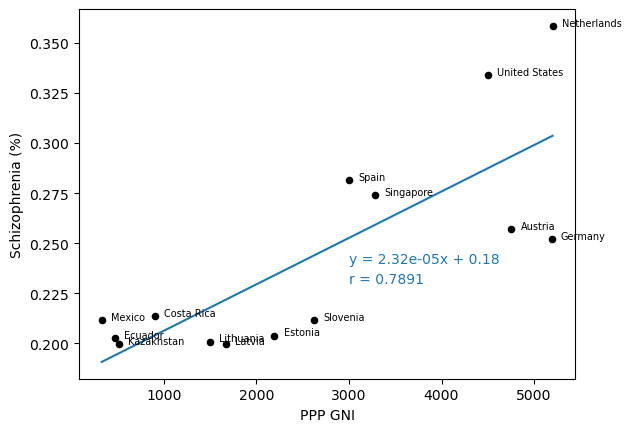

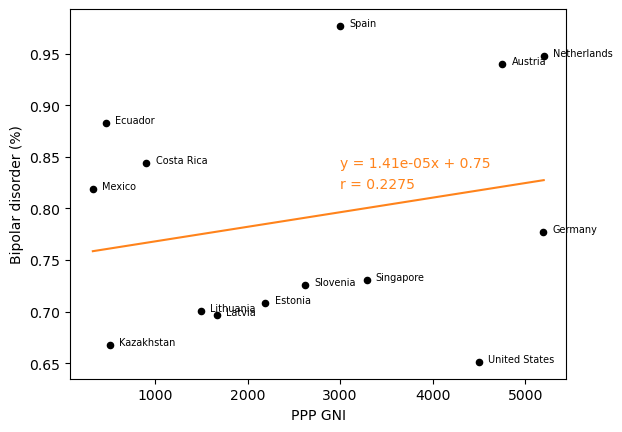

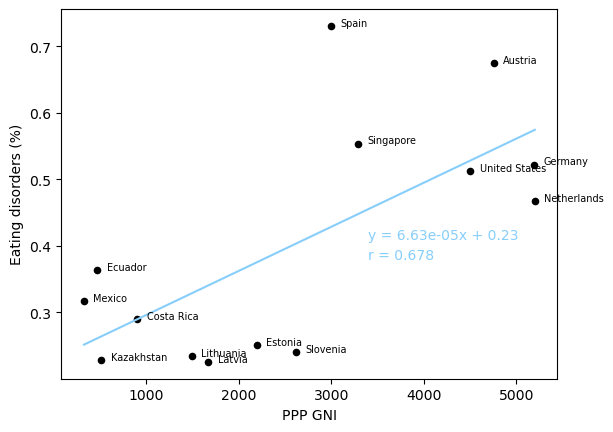

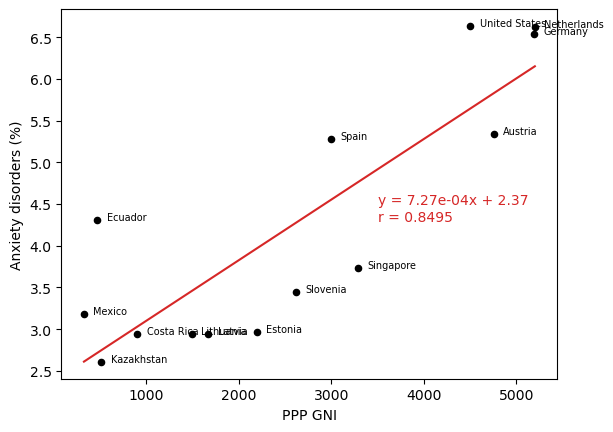

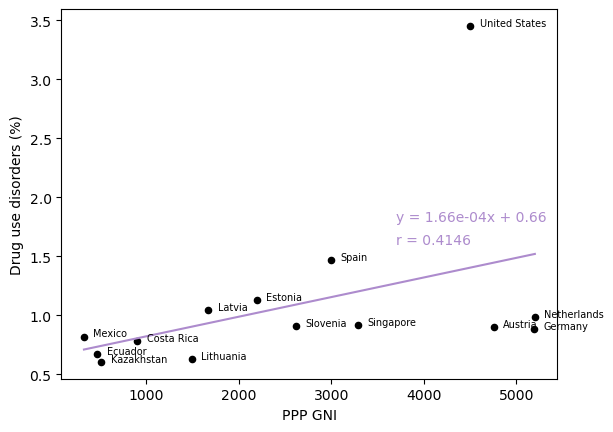

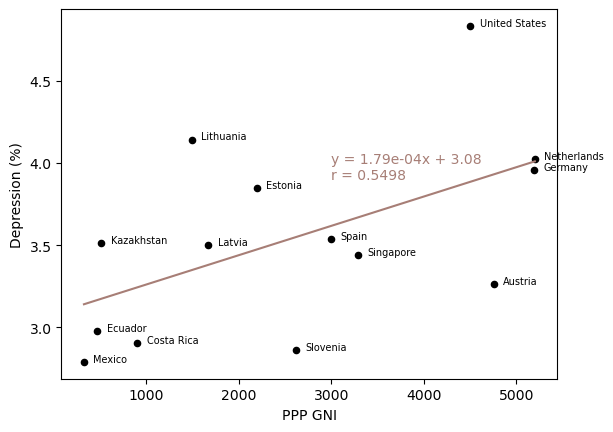

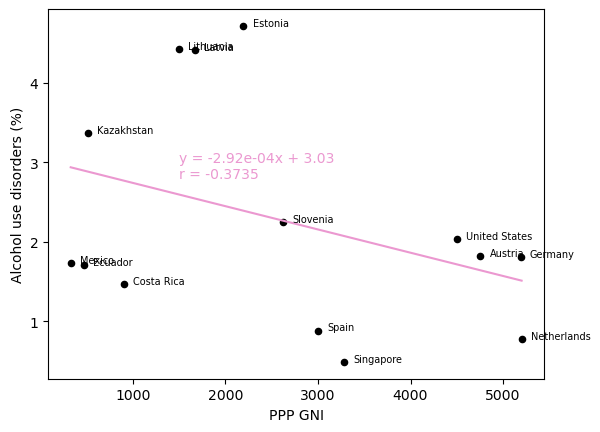

In [1048]:
plot1 = income_mental_disorder.plot(kind="scatter", x="PPP GNI", y="Schizophrenia (%)", xlabel="PPP GNI", ylabel="Schizophrenia (%)", color="black")
x = income_mental_disorder["PPP GNI"]
y1 = income_mental_disorder["Schizophrenia (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#1f77b4")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3000, 0.24), color="#1f77b4")
plt.annotate(f"r = {round(rvalue,4)}", (3000, 0.23), color="#1f77b4")
for index, row in income_mental_disorder.iterrows():
    plt.text(row["PPP GNI"]+100, row["Schizophrenia (%)"], row['country'], fontsize=7)
#plt.savefig("Data visualization/Income Schizo.png")
#plt.legend(['Schizophrenia'], loc="best")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot2 = income_mental_disorder.plot(kind="scatter", x="PPP GNI", y="Bipolar disorder (%)", xlabel="PPP GNI", ylabel="Bipolar disorder (%)", color="black")
x = income_mental_disorder["PPP GNI"]
y1 = income_mental_disorder["Bipolar disorder (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#FF831B")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3000, 0.84), color="#FF831B")
plt.annotate(f"r = {round(rvalue,4)}", (3000, 0.82), color="#FF831B")
for index, row in income_mental_disorder.iterrows():
    plt.text(row["PPP GNI"]+100, row["Bipolar disorder (%)"], row['country'], fontsize=7)
#plt.savefig("Data visualization/Income Bipolar.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot3 = income_mental_disorder.plot(kind="scatter", x="PPP GNI", y="Eating disorders (%)", xlabel="PPP GNI", ylabel="Eating disorders (%)", color="black")
x = income_mental_disorder["PPP GNI"]
y1 = income_mental_disorder["Eating disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="lightskyblue")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3400, 0.41), color="lightskyblue")
plt.annotate(f"r = {round(rvalue,4)}", (3400, 0.38), color="lightskyblue")
for index, row in income_mental_disorder.iterrows():
    plt.text(row["PPP GNI"]+100, row["Eating disorders (%)"], row['country'], fontsize=7)
#plt.savefig("Data visualization/Income ED.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot4 = income_mental_disorder.plot(kind="scatter", x="PPP GNI", y="Anxiety disorders (%)", xlabel="PPP GNI", ylabel="Anxiety disorders (%)", color="black")
x = income_mental_disorder["PPP GNI"]
y1 = income_mental_disorder["Anxiety disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#D62727")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3500, 4.5), color="#D62727")
plt.annotate(f"r = {round(rvalue,4)}", (3500, 4.3), color="#D62727")
for index, row in income_mental_disorder.iterrows():
    plt.text(row["PPP GNI"]+100, row["Anxiety disorders (%)"], row['country'], fontsize=7)
#plt.savefig("Data visualization/Income Anxiety.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot5 = income_mental_disorder.plot(kind="scatter", x="PPP GNI", y="Drug use disorders (%)", xlabel="PPP GNI", ylabel="Drug use disorders (%)", color="black")
x = income_mental_disorder["PPP GNI"]
y1 = income_mental_disorder["Drug use disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#AD8BCD")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3700,1.8), color="#AD8BCD")
plt.annotate(f"r = {round(rvalue,4)}", (3700,1.6), color="#AD8BCD")
for index, row in income_mental_disorder.iterrows():
    plt.text(row["PPP GNI"]+100, row["Drug use disorders (%)"], row['country'], fontsize=7)
#plt.savefig("Data visualization/Income Drug.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot6 = income_mental_disorder.plot(kind="scatter", x="PPP GNI", y="Depression (%)", xlabel="PPP GNI", ylabel="Depression (%)", color="black")
x = income_mental_disorder["PPP GNI"]
y1 = income_mental_disorder["Depression (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#A77E76")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3000,4), color="#A77E76")
plt.annotate(f"r = {round(rvalue,4)}", (3000,3.9), color="#A77E76")
for index, row in income_mental_disorder.iterrows():
    plt.text(row["PPP GNI"]+100, row["Depression (%)"], row['country'], fontsize=7)
#plt.savefig("Data visualization/Income Depression.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot7 = income_mental_disorder.plot(kind="scatter", x="PPP GNI", y="Alcohol use disorders (%)", xlabel="PPP GNI", ylabel="Alcohol use disorders (%)", color="black")
x = income_mental_disorder["PPP GNI"]
y1 = income_mental_disorder["Alcohol use disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#EB98D0")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (1500,3), color="#EB98D0")
plt.annotate(f"r = {round(rvalue,4)}", (1500,2.8), color="#EB98D0")
for index, row in income_mental_disorder.iterrows():
    plt.text(row["PPP GNI"]+100, row["Alcohol use disorders (%)"], row['country'], fontsize=7)
#plt.savefig("Data visualization/Income Alcohol.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plt.show()